# Citrus Leaves Classification Problem Using RMSProp Optimizer
## Team Salvator Brothers
## Assignment 4-5

**----------------------------------------------------------------------------------------------**

## Importing Libraries

In [12]:
# Imports
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


## Training-Testing-Validation Dataset Splitting

Splitting Given Training Data into Training, Validation Set (3:1 |OR| 75:25)
Selecting Whole Given Validation data as Training Dataset

ie. Data split (Tr:Te:Va - 3:1:1)

In [13]:
from keras.preprocessing.image import ImageDataGenerator as IDG
from sklearn.model_selection import train_test_split

idg_train = IDG(
    rescale=1./ 255,
    rotation_range=180,
    zoom_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.25)

idg_test = IDG(rescale=1./ 255)

ds_train=idg_train.flow_from_directory('../input/citrus-leaves-prepared/citrus_leaves_prepared/train',batch_size=32,shuffle=True,subset='training')
ds_valid=idg_train.flow_from_directory('../input/citrus-leaves-prepared/citrus_leaves_prepared/train',batch_size=8,shuffle=True,subset='validation')


ds_test=idg_test.flow_from_directory('../input/citrus-leaves-prepared/citrus_leaves_prepared/validation',batch_size=1,shuffle=True)

Found 358 images belonging to 4 classes.
Found 117 images belonging to 4 classes.
Found 121 images belonging to 4 classes.


## Model defining

In [14]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers as rg
from tensorflow.keras import initializers as it

model = tf.keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3),padding='same'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu',padding='same'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)       

## Model Training and fitting
Used RMSprop as optimizer,
Categorical Cross Entropy as Loss

Hyper Parameters
* Learning Rate - 0.0004

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=4*1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy','Precision','Recall']
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=35
 )

Epoch 1/35
12/12 [==============================] - 9s 722ms/step - loss: 1.4071 - accuracy: 0.3731 - precision: 0.3161 - recall: 0.7309 - val_loss: 1.3170 - val_accuracy: 0.3419 - val_precision: 0.3020 - val_recall: 0.9060
Epoch 2/35
12/12 [==============================] - 8s 680ms/step - loss: 1.2939 - accuracy: 0.3898 - precision: 0.3092 - recall: 0.9216 - val_loss: 1.2312 - val_accuracy: 0.4188 - val_precision: 0.3064 - val_recall: 0.9060
Epoch 3/35
12/12 [==============================] - 8s 709ms/step - loss: 1.2184 - accuracy: 0.4040 - precision: 0.3360 - recall: 0.8746 - val_loss: 1.2073 - val_accuracy: 0.3504 - val_precision: 0.3668 - val_recall: 0.8120
Epoch 4/35
12/12 [==============================] - 8s 669ms/step - loss: 1.1735 - accuracy: 0.4193 - precision: 0.3688 - recall: 0.8209 - val_loss: 1.1426 - val_accuracy: 0.4786 - val_precision: 0.3344 - val_recall: 0.8889
Epoch 5/35
12/12 [==============================] - 7s 632ms/step - loss: 1.0530 - accuracy: 0.5120 - pr

## Plotting the Graphs for Loss, Accuracy, Precision, Recall

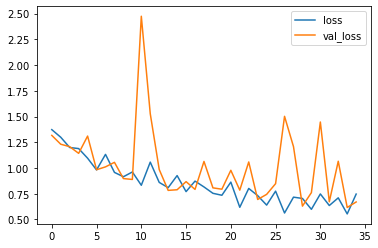

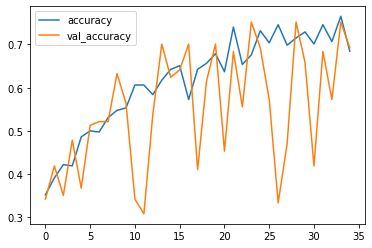

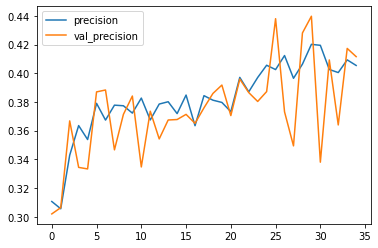

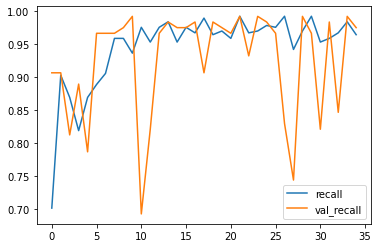

In [16]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
history_frame.loc[:, ['precision', 'val_precision']].plot();
history_frame.loc[:, ['recall', 'val_recall']].plot();

## Evaluating the Model using the Training Data

**Output**

* **loss:** 0.4764
* **accuracy:** 0.8156
* **precision:** 0.4140
* **recall:** 0.9944

In [ ]:
model.evaluate(ds_train)